#

# Setup
sets up the environment to work with PySpark, importing necessary libraries and creating a SparkSession object.

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType
import pyspark.sql.functions as funcs
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.types import *
spark = SparkSession.builder.appName("ReadFromTxt").getOrCreate()
print("This is spark", spark)

This is spark <pyspark.sql.session.SparkSession object at 0x7f9cfaf89090>


# Read the data from the text file with pd
To show the difference between the two approaches, we will read the data from the text file using both pandas and PySpark. 

In [9]:
import pandas as pd
# reading ds with pandas
df = pd.read_csv("./Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df.head()

# print("the dataset head from text file")
# print(df);

df.shape
df.describe()


FileNotFoundError: [Errno 2] No such file or directory: './Train.txt'

# Read the data from the text file with spark
To read the data from the text file using PySpark, we will use the SparkSession object we created earlier.

In [4]:
# Define the schema for the KDDCUP'99 dataset
schema = StructType([
    StructField("duration", IntegerType(), True),
    StructField("protocoltype", StringType(), True),
    StructField("service", StringType(), True),
    StructField("flag", StringType(), True),
    StructField("srcbytes", IntegerType(), True),
    StructField("dstbytes", IntegerType(), True),
    StructField("land", IntegerType(), True),
    StructField("wrongfragment", IntegerType(), True),
    StructField("urgent", IntegerType(), True),
    StructField("hot", IntegerType(), True),
    StructField("numfailedlogins", IntegerType(), True),
    StructField("loggedin", IntegerType(), True),
    StructField("numcompromised", IntegerType(), True),
    StructField("rootshell", IntegerType(), True),
    StructField("suattempted", IntegerType(), True),
    StructField("numroot", IntegerType(), True),
    StructField("numfilecreations", IntegerType(), True),
    StructField("numshells", IntegerType(), True),
    StructField("numaccessfiles", IntegerType(), True),
    StructField("numoutboundcmds", IntegerType(), True),
    StructField("ishostlogin", IntegerType(), True),
    StructField("isguestlogin", IntegerType(), True),
    StructField("count", IntegerType(), True),
    StructField("srvcount", IntegerType(), True),
    StructField("serrorrate", DoubleType(), True),
    StructField("srvserrorrate", DoubleType(), True),
    StructField("rerrorrate", DoubleType(), True),
    StructField("srvrerrorrate", DoubleType(), True),
    StructField("samesrvrate", DoubleType(), True),
    StructField("diffsrvrate", DoubleType(), True),
    StructField("srvdiffhostrate", DoubleType(), True),
    StructField("dsthostcount", IntegerType(), True),
    StructField("dsthostsrvcount", IntegerType(), True),
    StructField("dsthostsamesrvrate", DoubleType(), True),
    StructField("dsthostdiffsrvrate", DoubleType(), True),
    StructField("dsthostsamesrcportrate", DoubleType(), True),
    StructField("dsthostsrvdiffhostrate", DoubleType(), True),
    StructField("dsthostserrorrate", DoubleType(), True),
    StructField("dsthostsrvserrorrate", DoubleType(), True),
    StructField("dsthostrerrorrate", DoubleType(), True),
    StructField("dsthostsrvrerrorrate", DoubleType(), True),
    StructField("attack", StringType(), True),
    StructField("lastflag", IntegerType(), True)
])

# Read the KDDCUP'99 dataset and infer schema at the same time
df2 = spark.read \
            .format("csv")\
            .option("header", True)\
            .option("sep", ",")\
            .option("inferSchema", "True")\
            .load("./TrainDf.csv")
df2.printSchema()
df2.show(5)


root
 |-- duration: integer (nullable = true)
 |-- src_bytes: integer (nullable = true)
 |-- dst_bytes: integer (nullable = true)
 |-- land: integer (nullable = true)
 |-- wrong_fragment: integer (nullable = true)
 |-- urgent: integer (nullable = true)
 |-- hot: integer (nullable = true)
 |-- num_failed_logins: integer (nullable = true)
 |-- logged_in: integer (nullable = true)
 |-- num_compromised: integer (nullable = true)
 |-- root_shell: integer (nullable = true)
 |-- su_attempted: integer (nullable = true)
 |-- num_root: integer (nullable = true)
 |-- num_file_creations: integer (nullable = true)
 |-- num_shells: integer (nullable = true)
 |-- num_access_files: integer (nullable = true)
 |-- num_outbound_cmds: integer (nullable = true)
 |-- is_host_login: integer (nullable = true)
 |-- is_guest_login: integer (nullable = true)
 |-- count: integer (nullable = true)
 |-- srv_count: integer (nullable = true)
 |-- serror_rate: double (nullable = true)
 |-- srv_serror_rate: double (nul

In [5]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml import Pipeline

# Define features column

In [6]:
# define the feature columns to put in the feature vector 
feature_cols = df2.columns[:-1]
# print the feature columns
print(feature_cols)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


# Create the string indexer for the status column

In [7]:
# create string indexer for the status labels
# this will map the string labels to integer indices
label_indexer = StringIndexer(inputCol = "status", outputCol = "label")
print(label_indexer)

StringIndexer_b3161860cc1c


# Create the vector assembler for the features

In [8]:
# instantiate the vector assembler and set the input and output columns
# use the vector assembler to combine the feature columns into a single vector column
assembler = VectorAssembler(inputCols = feature_cols, outputCol = "features")
print(assembler)

VectorAssembler_f0ebe0694044


# define th pipeline model

In [9]:
# instantiate the pipeline using the vector assembler and stringIndexer
pipe = Pipeline(stages=[assembler, label_indexer])
# fit the pipeline model and transform the dataset
# a pipeline model is a transformer which contains a sequence
#  of transformers and optionally an estimator
pipe_model = pipe.fit(df2)

print(pipe_model)

PipelineModel_cab2782b90e8


# Transform the dataframe
in order to transform the dataframe, we will use the pipeline model we created earlier. this will apply the string indexer and vector assembler to the dataframe. and will create a new column called features with the vectorized features and a new column called label with the indexed status.

In [10]:
# transform the data using the pipeline model
data = pipe_model.transform(df2)
print(data)

# select only the features and label columns for the new dataframe
data = data.select("features","label")
print(data)

DataFrame[duration: int, src_bytes: int, dst_bytes: int, land: int, wrong_fragment: int, urgent: int, hot: int, num_failed_logins: int, logged_in: int, num_compromised: int, root_shell: int, su_attempted: int, num_root: int, num_file_creations: int, num_shells: int, num_access_files: int, num_outbound_cmds: int, is_host_login: int, is_guest_login: int, count: int, srv_count: int, serror_rate: double, srv_serror_rate: double, rerror_rate: double, srv_rerror_rate: double, same_srv_rate: double, diff_srv_rate: double, srv_diff_host_rate: double, dst_host_count: int, dst_host_srv_count: int, dst_host_same_srv_rate: double, dst_host_diff_srv_rate: double, dst_host_same_src_port_rate: double, dst_host_srv_diff_host_rate: double, dst_host_serror_rate: double, dst_host_srv_serror_rate: double, dst_host_rerror_rate: double, dst_host_srv_rerror_rate: double, status: string, features: vector, label: double]
DataFrame[features: vector, label: double]


In [ ]:
# split the data into train and test sets
train, test = data.randomSplit([0.70, 0.30])
print(train.count())
print(test.count())
# desc the train and test data
train.describe().show()
test.describe().show()

In [12]:
# import the decision tree classifier class and classification evaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier

In [13]:
# create the decision tree classifier instance
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

# train the model on the training data
modeldt = dt.fit(train)
# make predictions on the test data using the transform() method on the test data
predictiondt = modeldt.transform(test)
# view model predictions
predictiondt.toPandas().head()

,features,label,rawPrediction,probability,prediction
0,"(4675.0, 459.0, 81673.0, 0.0, 0.0, 0.0, 2.0, 1...",0.0,"[613.0, 49.0]","[0.9259818731117825, 0.07401812688821752]",0.0
1,"(540.0, 518.0, 16116.0, 0.0, 0.0, 0.0, 2.0, 0....",0.0,"[613.0, 49.0]","[0.9259818731117825, 0.07401812688821752]",0.0
2,"(113.0, 6274.0, 16771.0, 0.0, 0.0, 0.0, 5.0, 0...",1.0,"[9.0, 0.0]","[1.0, 0.0]",0.0
3,"(17903.0, 5830.0, 122343.0, 0.0, 0.0, 0.0, 77....",0.0,"[9.0, 0.0]","[1.0, 0.0]",0.0
4,"(4.0, 54540.0, 8314.0, 0.0, 0.0, 0.0, 2.0, 0.0...",1.0,"[1.0, 709.0]","[0.0014084507042253522, 0.9985915492957746]",1.0


In [14]:
# prediction and label columns to view the predictions against the true labels
predictiondt.select("prediction", "label")\
.groupBy("prediction", "label").count()\
.orderBy("prediction", "label", ascending=True).withColumn("status",
funcs.when(funcs.col("label").isin(1), "Anomaly")\
.otherwise("Normal")).toPandas().head()
# here we group by the prediction and label columns and count the number of instances
# anomalies are labeled as 1 and normal instances are labeled as 0

,prediction,label,count,status
0,0.0,0.0,19754,Normal
1,0.0,1.0,261,Anomaly
2,1.0,0.0,666,Normal
3,1.0,1.0,17428,Anomaly


In [15]:
predictiondt.groupBy(["label","prediction"]).count().toPandas().head()

,label,prediction,count
0,1.0,1.0,17428
1,0.0,1.0,666
2,1.0,0.0,261
3,0.0,0.0,19754


In [16]:
# evaluate the accuracy of the model using the test data
evaluatordt = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
dt = evaluatordt.evaluate(predictiondt)

print("--- Decision Tree --- ")
print("Accuracy Rate =", round(dt,4))
print("  Error  Rate = %g " % round((1.0 - dt),4))

--- Decision Tree --- 
Accuracy Rate = 0.9757
  Error  Rate = 0.0243 


In [18]:
# confusion matrix for the decision tree model
# create an rdd for the prediction and label columns
predictionAndLabel = predictiondt.select("prediction", "label").rdd

# import the MulticlassMetrics class
from pyspark.mllib.evaluation import MulticlassMetrics

# instantiate the metrics object
metrics = MulticlassMetrics(predictionAndLabel)
# call the metrics methods to view the confusion matrix
cm = metrics.confusionMatrix()

# convert the matrix to rows
rows = cm.toArray().tolist()

# create a spark dataframe from the confusion matrix rows
confusion_matrix = spark.createDataFrame(rows,["normal","anomaly"])
# print the confusion matrix
confusion_matrix.show()


+-------+-------+
| normal|anomaly|
+-------+-------+
|19754.0|  666.0|
|  261.0|17428.0|
+-------+-------+



In [19]:
predictiondt.withColumn("A", funcs.struct("prediction","label")).crosstab("prediction","label").show()

+----------------+-----+-----+
|prediction_label|  0.0|  1.0|
+----------------+-----+-----+
|             1.0|  666|17428|
|             0.0|19754|  261|
+----------------+-----+-----+



# Random forest classifier model
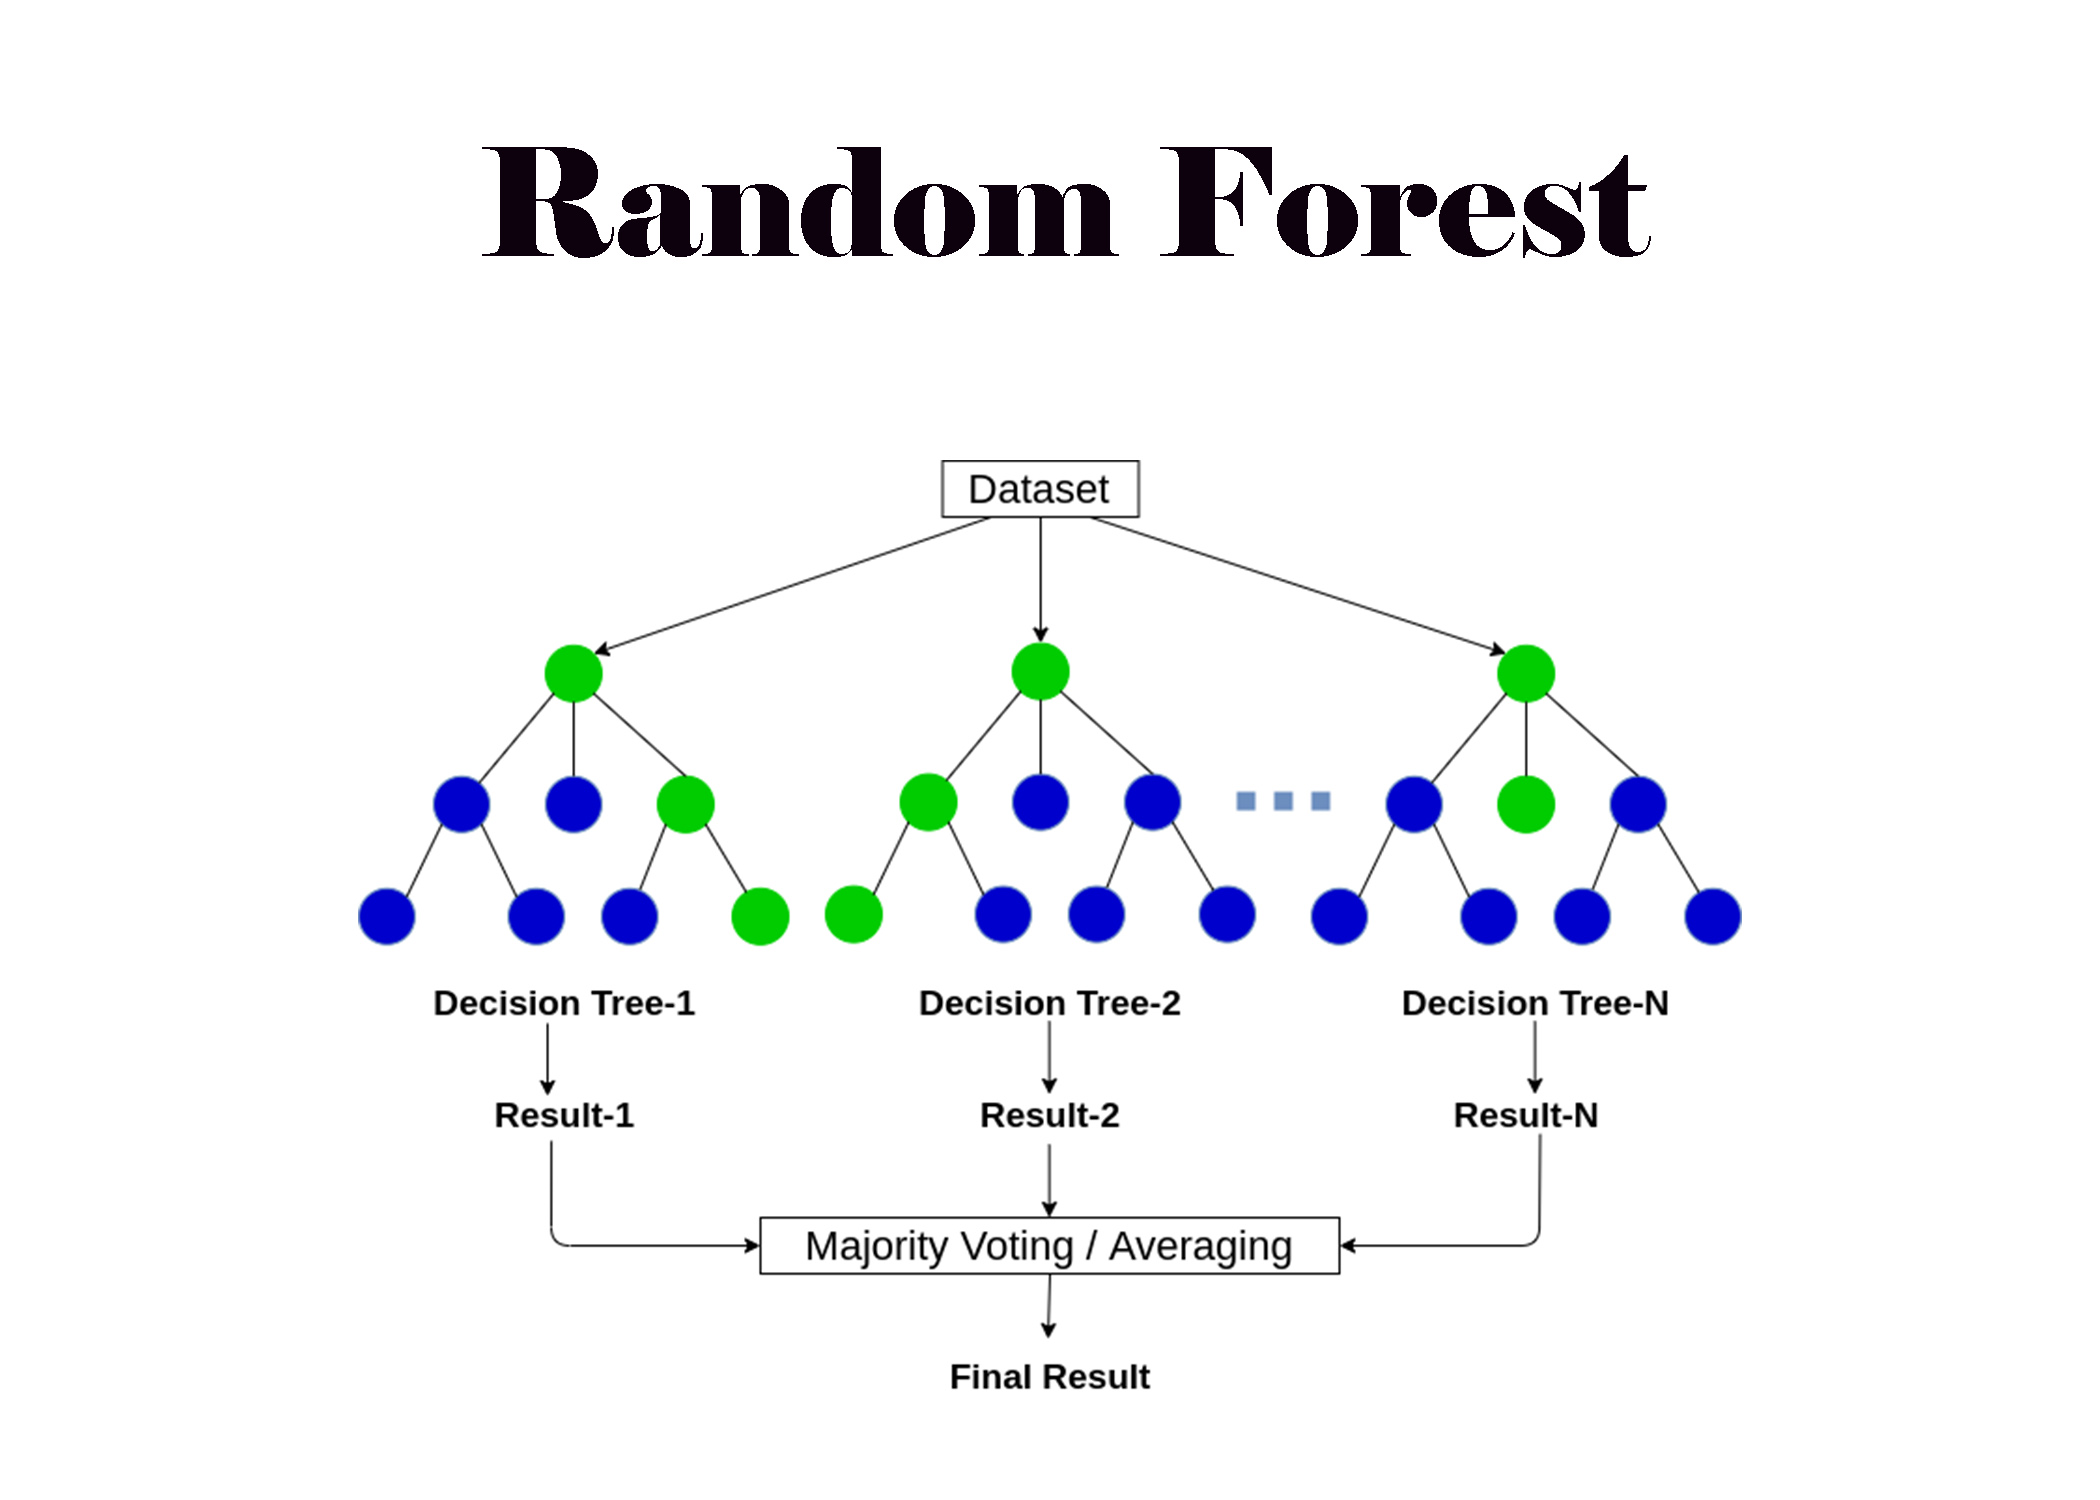

In [20]:
from pyspark.ml.classification import RandomForestClassifier

In [21]:
# create the random forest classifier instance
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=10)
# train the model on the training data
modelrf = rf.fit(train)
# make predictions on the test data using the transform() method on the test data
predictionrf = modelrf.transform(test)
# view model predictions
predictionrf.toPandas().head(3)

,features,label,rawPrediction,probability,prediction
0,"(4675.0, 459.0, 81673.0, 0.0, 0.0, 0.0, 2.0, 1...",0.0,"[8.26824094778236, 1.7317590522176403]","[0.8268240947782359, 0.17317590522176401]",0.0
1,"(540.0, 518.0, 16116.0, 0.0, 0.0, 0.0, 2.0, 0....",0.0,"[8.531652095640505, 1.468347904359495]","[0.8531652095640505, 0.1468347904359495]",0.0
2,"(113.0, 6274.0, 16771.0, 0.0, 0.0, 0.0, 5.0, 0...",1.0,"[4.639560030487433, 5.360439969512567]","[0.46395600304874335, 0.5360439969512567]",1.0


In [22]:
# evaluate the accuracy of the model using the test data
evaluatorrf = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
rf = evaluatorrf.evaluate(predictionrf)

print("--- Random Forest Tree --- ")
print("Accuracy Rate =", round(rf,4))
print("  Error  Rate = %g " % round((1.0 - rf),4))

--- Random Forest Tree --- 
Accuracy Rate = 0.9818
  Error  Rate = 0.0182 


In [24]:
# Confusion Matrix for Random Forest
predictionAndLabel = predictionrf.select("prediction", "label").rdd

from pyspark.mllib.evaluation import MulticlassMetrics
metrics = MulticlassMetrics(predictionAndLabel)
cm = metrics.confusionMatrix()
rows = cm.toArray().tolist()

confusion_matrix = spark.createDataFrame(rows,["normal","anomaly"])
confusion_matrix.show()

+-------+-------+
| normal|anomaly|
+-------+-------+
|20271.0|  149.0|
|  544.0|17145.0|
+-------+-------+



In [25]:
# Confusion Matrix for Random Forest
predictionAndLabels = predictionrf.select("prediction", "label").rdd
metrics = MulticlassMetrics(predictionAndLabels)
metrics.confusionMatrix()

DenseMatrix(2, 2, [20271.0, 544.0, 149.0, 17145.0], 0)

In [27]:

predictionrf.withColumn("A", funcs.struct("prediction","label")).crosstab("prediction","label").show() # Confusion Matrix for Random Forest

+----------------+-----+-----+
|prediction_label|  0.0|  1.0|
+----------------+-----+-----+
|             1.0|  149|17145|
|             0.0|20271|  544|
+----------------+-----+-----+



In [28]:
# classification evaluator for the random forest model
predictionrfevaluator = MulticlassClassificationEvaluator(predictionCol="prediction", \
                    labelCol="label",metricName="accuracy") # accuracy is default metric for MulticlassClassificationEvaluator

# evaluate the model   
predictionrfevaluator.evaluate(predictionrf)    

predictionrf.groupBy("label","prediction").count().show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|17145|
|  0.0|       1.0|  149|
|  1.0|       0.0|  544|
|  0.0|       0.0|20271|
+-----+----------+-----+



# Naive Bayes classifier model

In [29]:
# import naive bayes classifier and classification evaluator
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [30]:
# create the naive bayes classifier instance
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

# train the model on the training data
modelnb = nb.fit(train)
# make predictions on the test data using the transform() method on the test data
predictionnb = modelnb.transform(test)
# view model predictions
predictionnb.toPandas().head(3)

,features,label,rawPrediction,probability,prediction
0,"(4675.0, 459.0, 81673.0, 0.0, 0.0, 0.0, 2.0, 1...",0.0,"[-140722.70304994742, -118112.31001308138]","[0.0, 1.0]",1.0
1,"(540.0, 518.0, 16116.0, 0.0, 0.0, 0.0, 2.0, 0....",0.0,"[-26531.355017992057, -21898.358742272158]","[0.0, 1.0]",1.0
2,"(113.0, 6274.0, 16771.0, 0.0, 0.0, 0.0, 5.0, 0...",1.0,"[-26692.77611158711, -21813.50210462008]","[0.0, 1.0]",1.0


In [31]:
# evaluate the accuracy of the model using the test data
evaluatornb = MulticlassClassificationEvaluator(labelCol="label", 
                                              predictionCol="prediction", 
                                              metricName="accuracy")
nb = evaluatornb.evaluate(predictionnb)

print("--- Naive Bayes --- ")
print("Accuracy Rate =", round(nb,4))
print("  Error  Rate = %g " % round((1.0 - nb),4))

--- Naive Bayes --- 
Accuracy Rate = 0.4387
  Error  Rate = 0.5613 


# Logistic regression classifier model

In [35]:
from pyspark.ml.classification import LogisticRegression

In [36]:
lr = LogisticRegression(regParam=0.01)
modellr = lr.fit(train)
predictionlr = modellr.transform(test)
predictionlr.toPandas().head(3)

,features,label,rawPrediction,probability,prediction
0,"(4675.0, 459.0, 81673.0, 0.0, 0.0, 0.0, 2.0, 1...",0.0,"[1.1931529336497106, -1.1931529336497106]","[0.767304489587135, 0.23269551041286496]",0.0
1,"(583.0, 848.0, 25323.0, 0.0, 0.0, 0.0, 1.0, 0....",0.0,"[1.4458800014575877, -1.4458800014575877]","[0.8093635522402715, 0.19063644775972854]",0.0
2,"(4.0, 54540.0, 8314.0, 0.0, 0.0, 0.0, 2.0, 0.0...",1.0,"[2.779543577457583, -2.779543577457583]","[0.9415603351098282, 0.05843966489017183]",0.0


In [37]:
evaluatorlr = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
lr = evaluatorlr.evaluate(predictionlr)


In [38]:
print("--- Logistic Regression --- ")
print("Accuracy Rate =", round(lr,4))
print("  Error  Rate = %g " % round((1.0 - lr),4))

--- Logistic Regression --- 
Accuracy Rate = 0.9473
  Error  Rate = 0.0527 


In [39]:
print("Decision Tree Accuracy = ", round(dt,5))
print("Random Forest Tree Accuracy = ", round(rf,5))
print("Naive Bayes Accuracy = ", round(nb,5))

Gradient Boost Tree Accuracy = 0.99183
      Decision Tree Accuracy = 0.97593
 Random Forest Tree Accuracy = 0.98198
Logistic Regression Accuracy = 0.94733
        Naive Bayes Accuracy = 0.41637


# Streaming process

In [40]:
schema = StructType(
[
    StructField("duration", FloatType(), True),
    StructField("src_bytes", FloatType(), True),
    StructField("dst_bytes", FloatType(), True),
    StructField("land", FloatType(), True),
    StructField("wrong_fragment", FloatType(), True),
    StructField("urgent", FloatType(), True),
    StructField("hot", FloatType(), True),
    StructField("num_failed_logins", FloatType(), True),
    StructField("logged_in", FloatType(), True),
    StructField("num_compromised", FloatType(), True),
    StructField("root_shell", FloatType(), True),
    StructField("su_attempted", FloatType(), True),
    StructField("num_root", FloatType(), True),
    StructField("num_file_creations", FloatType(), True),
    StructField("num_shells", FloatType(), True),
    StructField("num_access_files", FloatType(), True),
    StructField("num_outbound_cmds", FloatType(), True),
    StructField("is_host_login", FloatType(), True),
    StructField("is_guest_login", FloatType(), True),
    StructField("count", FloatType(), True),
    StructField("srv_count", FloatType(), True),
    StructField("serror_rate", FloatType(), True),
    StructField("srv_serror_rate", FloatType(), True),
    StructField("rerror_rate", FloatType(), True),
    StructField("srv_rerror_rate", FloatType(), True),
    StructField("same_srv_rate", FloatType(), True),
    StructField("diff_srv_rate", FloatType(), True),
    StructField("srv_diff_host_rate", FloatType(), True),
    StructField("dst_host_count", FloatType(), True),
    StructField("dst_host_srv_count", FloatType(), True),
    StructField("dst_host_same_srv_rate", FloatType(), True),
    StructField("dst_host_diff_srv_rate", FloatType(), True),
    StructField("dst_host_same_src_port_rate", FloatType(), True),
    StructField("dst_host_srv_diff_host_rate", FloatType(), True),
    StructField("dst_host_serror_rate", FloatType(), True),
    StructField("dst_host_srv_serror_rate", FloatType(), True),
    StructField("dst_host_rerror_rate", FloatType(), True),
    StructField("dst_host_srv_rerror_rate", FloatType(), True),
    
    # The label (Anomaly,Normal)
    
    StructField("status", StringType(), True)
])

print(schema)

StructType([StructField('duration', FloatType(), True), StructField('src_bytes', FloatType(), True), StructField('dst_bytes', FloatType(), True), StructField('land', FloatType(), True), StructField('wrong_fragment', FloatType(), True), StructField('urgent', FloatType(), True), StructField('hot', FloatType(), True), StructField('num_failed_logins', FloatType(), True), StructField('logged_in', FloatType(), True), StructField('num_compromised', FloatType(), True), StructField('root_shell', FloatType(), True), StructField('su_attempted', FloatType(), True), StructField('num_root', FloatType(), True), StructField('num_file_creations', FloatType(), True), StructField('num_shells', FloatType(), True), StructField('num_access_files', FloatType(), True), StructField('num_outbound_cmds', FloatType(), True), StructField('is_host_login', FloatType(), True), StructField('is_guest_login', FloatType(), True), StructField('count', FloatType(), True), StructField('srv_count', FloatType(), True), Struct

In [ ]:
iris_data = spark.readStream \
                .format("csv")\
                .option("header", True)\
                .option("sep", ",")\
                .schema(schema)\
                .load("./data")

In [ ]:
iris_data.printSchema()

In [44]:
features_array = iris_data.selectExpr("""array(
CAST(duration AS FLOAT),
CAST(src_bytes AS FLOAT), 
CAST(dst_bytes AS FLOAT), 
CAST(land AS FLOAT),
CAST(wrong_fragment AS FLOAT), 
CAST(urgent AS FLOAT), 
CAST(hot AS FLOAT), 
CAST(num_failed_logins AS FLOAT), 
CAST(logged_in AS FLOAT),
CAST(num_compromised AS FLOAT), 
CAST(root_shell AS FLOAT),
CAST(su_attempted AS FLOAT), 
CAST(num_root AS FLOAT),
CAST(num_file_creations AS FLOAT), 
CAST(num_shells  AS FLOAT), 
CAST(num_access_files  AS FLOAT),
CAST(num_outbound_cmds  AS FLOAT), 
CAST(is_host_login  AS FLOAT),
CAST(is_guest_login  AS FLOAT), 
CAST(count AS FLOAT), 
CAST(srv_count AS FLOAT),
CAST(serror_rate AS FLOAT), 
CAST(srv_serror_rate AS FLOAT),
CAST(rerror_rate AS FLOAT), 
CAST(srv_rerror_rate AS FLOAT),
CAST(same_srv_rate AS FLOAT),
CAST(diff_srv_rate AS FLOAT), 
CAST(srv_diff_host_rate AS FLOAT),
CAST(dst_host_count AS FLOAT),
CAST(dst_host_srv_count AS FLOAT), 
CAST(dst_host_same_srv_rate AS FLOAT),
CAST(dst_host_diff_srv_rate AS FLOAT),
CAST(dst_host_same_src_port_rate AS FLOAT),
CAST(dst_host_srv_diff_host_rate AS FLOAT), 
CAST(dst_host_serror_rate AS FLOAT),
CAST(dst_host_srv_serror_rate AS FLOAT),
CAST(dst_host_rerror_rate AS FLOAT), 
CAST(dst_host_srv_rerror_rate AS FLOAT)

) as arr""", 
"status")

In [47]:
tovec_udf = funcs.udf(lambda r: Vectors.dense(r), VectorUDT())
data_stream = features_array.withColumn("features", tovec_udf("arr"))

print(data_stream)

DataFrame[arr: array<float>, status: string, features: vector]


In [48]:
prediction = modelrf.transform(data_stream)

In [49]:
type(prediction)

pyspark.sql.dataframe.DataFrame

In [50]:
prediction.printSchema()

root
 |-- arr: array (nullable = false)
 |    |-- element: float (containsNull = true)
 |-- status: string (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [51]:
currentTimeDf = prediction.withColumn("processingTime",funcs.current_timestamp())

In [53]:
confusion_matrix = currentTimeDf\
.withWatermark("processingTime", "5 seconds")\
.groupBy(funcs.window("processingTime", "3 seconds", "1 seconds"),"status", "prediction")\
.count()\
.withColumn("prediction",funcs.when(funcs.col("prediction").isin(1.0), "anomaly")\
.otherwise("normal"))\
.orderBy("window")

print(confusion_matrix)

DataFrame[window: struct<start:timestamp,end:timestamp>, status: string, prediction: string, count: bigint]


In [54]:
q = confusion_matrix.writeStream\
.outputMode("complete")\
.format("console")\
.option("truncate", "false")\
.start()

In [55]:
q.awaitTermination()

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 55632)
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving
Traceback (most recent call last):
  File "/opt/conda/lib/python3.

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_10399/515767833.py", line 1, in <module>
    q.awaitTermination()
  File "/usr/local/spark/python/pyspark/sql/streaming/query.py", line 221, in awaitTermination
    return self._jsq.awaitTermination()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1322, in __call__
    return_value = get_return_value(
                   ^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/pyspark/errors/exceptions/captured.py", line 179, in deco
    return f(*a, **kw)
           ^^^^^^^^^^^
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/protocol.py", line 334, in get_return_value
    raise Py4JError(
py4j.protocol.Py4JError: An error occurred while calling o1351.awaitTermination

During handling of

In [ ]:
prediction = prediction.select("features","status","prediction")

In [ ]:
q = prediction.writeStream\
.outputMode("append")\
.format("console")\
.start()

In [ ]:
q.awaitTermination()